In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
t = pd.read_excel('../result/metabo_mean.xlsx')
fba = pd.read_csv('../result/fba_mse_glu_glc.csv', index_col=0)
a = fba.loc[[
    'R00268', 'R01056', 'R01049', 'R04779', 
    'R00342', 'R01082', 'R01325', 'R02740'
]].sort_index()
a.index = [
    'akg', 'R5P→R5P', 'PRPP', 'F6P→F1,6P', 'Oxaloacetate, Malate', 
    'Malate, Fumarate', 'Citrate', 'G6P→F6P'
]

In [3]:
fba.loc[[
    'BIOMASS', 'Glucose_input', 'Oxygen_input', 'Lactate_output', 'R00268', 'R01049'
]]

,Control,Clone A,Clone B
BIOMASS,7.996744e-07,1.397058e-06,1.027325e-06
Glucose_input,8.464604e-02,3.785903e-02,1.428799e-02
Oxygen_input,3.226715e-06,4.652392e-03,4.145295e-06
Lactate_output,1.866237e-01,6.642065e-02,4.051149e-02
R00268,0.000000e+00,4.646755e-03,0.000000e+00
R01049,1.028373e-07,1.796603e-07,1.321130e-07


/Users/yoshitaka-i/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


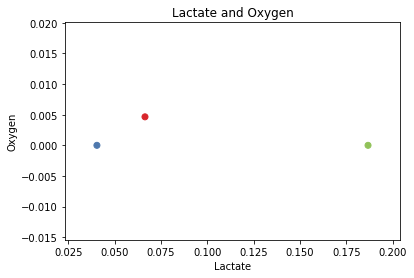

In [4]:
# Control Clone B Clone A
x = fba.loc['Lactate_output']
y = fba.loc['Oxygen_input'] 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y, color=['#91c259', '#d8252b', '#4e78ad'])
# ax.set_ylim(0, 0.006)
# ax.set_xlim(0, 0.08)
ax.set_title('Lactate and Oxygen')
ax.set_xlabel('Lactate')
ax.set_ylabel('Oxygen')
fig.show()

In [5]:
x = fba.loc['Glucose_input'] 
y = fba.loc['Oxygen_input'] 

In [6]:
y/x

Control    0.000038
Clone A    0.122887
Clone B    0.000290
dtype: float64

/Users/yoshitaka-i/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


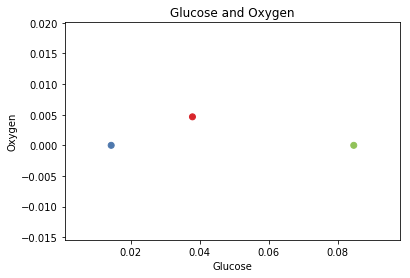

In [7]:
# Control Clone B Clone A
x = fba.loc['Glucose_input'] 
y = fba.loc['Oxygen_input'] 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y, color=['#91c259', '#d8252b', '#4e78ad'])

ax.set_title('Glucose and Oxygen')
ax.set_xlabel('Glucose')
ax.set_ylabel('Oxygen')
fig.show()

In [8]:
t.loc[['Glucose 1-phosphate']]

,Control,Clone A,Clone B
Glucose 1-phosphate,1.103544,6.888668,1.545911


In [9]:
b = []
for i in t.columns:
    b.append(sum(t.loc[['Cytosine', 'Uracil', 'Adenine', 'Guanine']][i]))

In [10]:
a.T['PRPP']

Control    1.028373e-07
Clone A    1.796603e-07
Clone B    1.321130e-07
Name: PRPP, dtype: float64

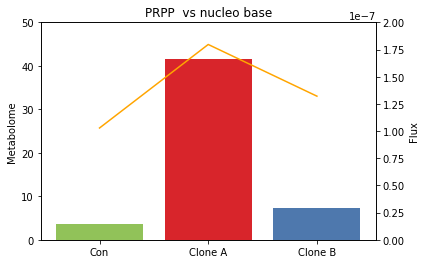

In [11]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 50)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['PRPP']), color='orange')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.0000002)
ax.set_title('PRPP  vs nucleo base')
plt.show()

In [12]:
b = t.loc['Ribulose 5-phosphate']

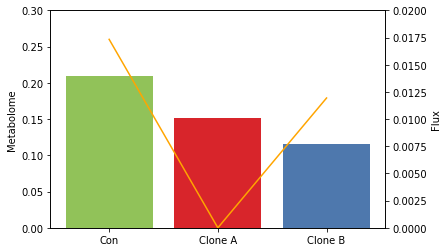

In [13]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.3)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['R5P→R5P']), color='orange')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.02)
plt.show()

In [14]:
amino_acid = ['Ala', 'Arg', 'Asn', 'Asp', 'Gln', 'Glu', 'Gly', 'Ornithine', 'Pro', 'Ser']

In [15]:
b = sum(t.loc[amino_acid]['Control']), sum(t.loc[amino_acid]['Clone A']), sum(t.loc[amino_acid]['Clone B'])

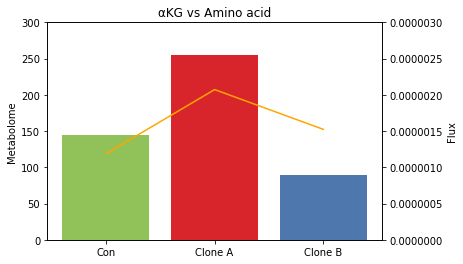

In [16]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 300)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.loc['BIOMASS']*1.4836099999999999), color='orange')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.000003)
ax.set_title('αKG vs Amino acid')
plt.show()

In [17]:
b = t.loc['Ribose 5-phosphate']

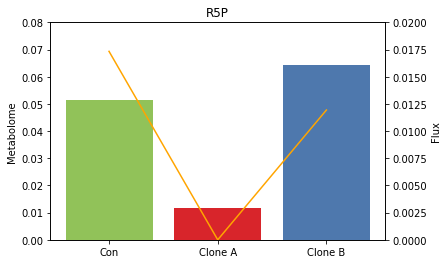

In [18]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.08)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['R5P→R5P']), color='orange')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.02)
ax.set_title('R5P')
plt.show()

In [19]:
b = t.loc['Fructose 1,6-diphosphate']

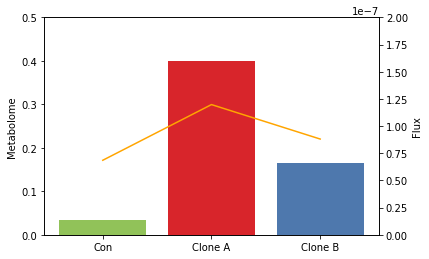

In [20]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.5)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['F6P→F1,6P'])*(-1), color='orange')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.0000002)
plt.show()

In [21]:
# b = t.loc['Malic acid']

In [22]:
# a.T['Malate, Fumarate']

In [23]:
# fig, ax = plt.subplots()

# ax2 = ax.twinx()
# p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
# ax.set_ylim(0, 4)
# ax.set_ylabel('Metabolome')
# ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['Malate, Fumarate']), color='orange')
# ax2.set_ylabel('Flux')
# ax2.set_ylim(0, 0.01)
# plt.show()

In [24]:
b = t.loc['Malic acid']

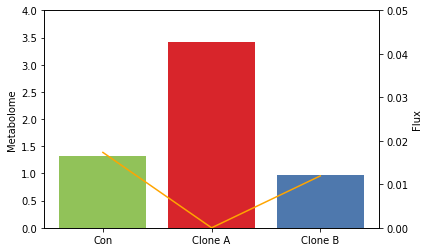

In [25]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 4)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['Oxaloacetate, Malate'])*(-1), color='orange')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.05)
plt.show()

In [26]:
b = t.loc['Citric acid']

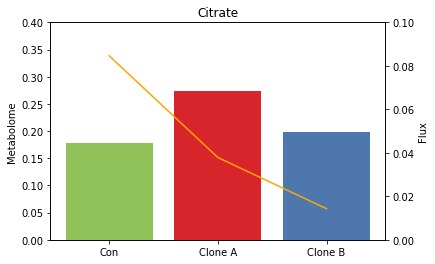

In [27]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.4)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['Citrate']), color='orange')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.1)
ax.set_title('Citrate')
plt.show()

In [28]:
b = t.loc['Fructose 6-phosphate']

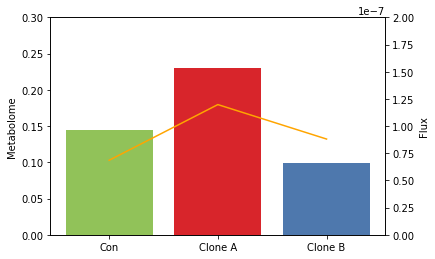

In [29]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.3)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['F6P→F1,6P'])*(-1), color='orange')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.0000002)
plt.show()

In [30]:
b = t.loc['Glucose 6-phosphate']

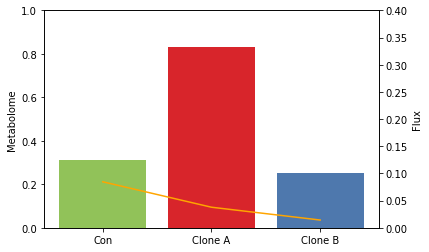

In [31]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 1)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(a.T['G6P→F6P']), color='orange')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.4)
plt.show()